# Kırık Tespiti Projesi

### PROJE AMACI:


Bu proje, ön kol MRI (Manyetik Rezonans Görüntüleme) görüntüleri üzerinde kırık tespiti yapmayı amaçlamaktadır. Elimizde bulunan 5 kırık ve 5 sağlam ön kol görüntüsünü kullanarak, çeşitli görüntü işleme teknikleri ve yapay zeka modelleri ile doğru ve güvenilir bir tespit mekanizması geliştirmek hedeflenmektedir.

##Hedefler
Görüntülerin İşlenmesi: Gürültü temizleme, kontrast artırma ve segmentasyon gibi yöntemler kullanarak görüntülerin analiz için hazır hale getirilmesi.
Kırık ve Sağlam Dokuların Sınıflandırılması: Convolutional Neural Networks (CNN) gibi derin öğrenme algoritmalarıyla sınıflandırma yapılarak kırık tespiti.
Doğruluk Analizi: Modelin başarımını ölçmek için IoU (Intersection over Union) metriklerinin hesaplanması ve görsel sonuçların değerlendirilmesi.
Görüntü Üzerindeki Bölgelerin İncelenmesi: Otsu Thresholding ve morfolojik operasyonlar gibi yöntemlerle kırık bölgelerinin detaylı analizi.

### KIRIK MRI GÖRÜNTÜLERİ:

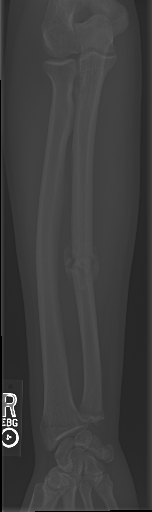 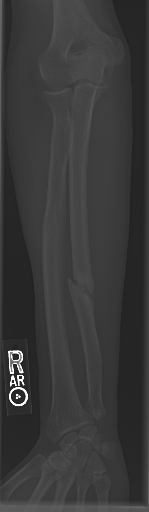 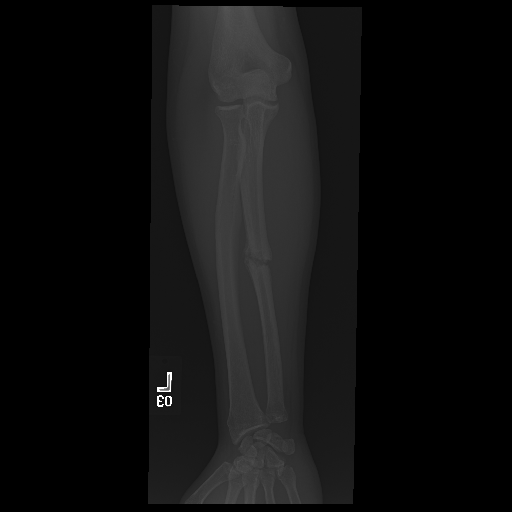 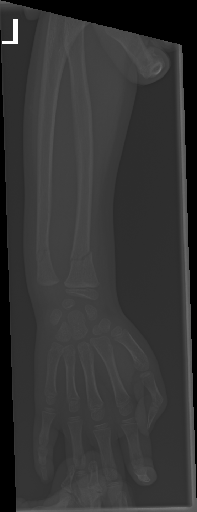 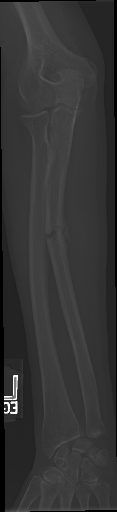 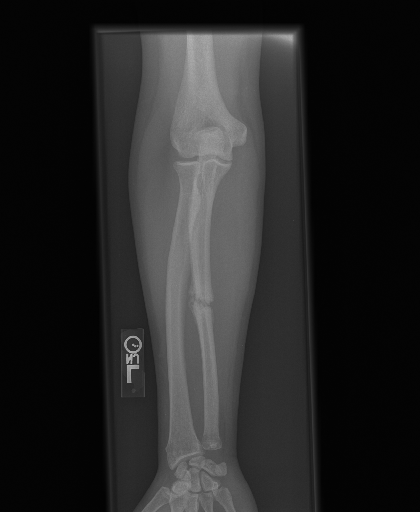 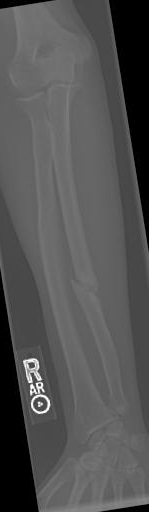


### Görsellerin Boyutlarını Küçültme Kodu




Bu kod, belirtilen klasörlerdeki görselleri (örneğin kırık ve sağlam görseller) alır, belirli bir boyuta (256x256) küçültür ve çıktıları gösterir.



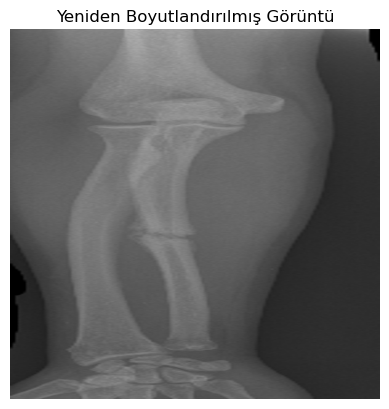

In [12]:

from PIL import Image
import matplotlib.pyplot as plt

# Görüntülerin bulunduğu klasör yolu
base_path = r"C:\Users\songu\OneDrive\Masaüstü\kirikler"

# Sadece işlem yapılacak tek bir görüntü
image_file = "kirik_6.png"

# Yeni boyut
new_size = (512, 512)

# Görüntüyü aç, RGB formatına dönüştür ve yeniden boyutlandır
try:
    img = Image.open(f"{base_path}\\{image_file}").convert('RGB').resize(new_size)

    # Görselleştirme
    plt.imshow(img)
    plt.title('Yeniden Boyutlandırılmış Görüntü')
    plt.axis('off')  # Eksenleri gizle
    plt.show()

except Exception as e:
    print(f"Hata: {image_file} - {e}")








## NORMALİZASYON İŞLEMİ:


Normalizasyon, veri setindeki değerlerin belirli bir aralığa sıkıştırılması işlemi olarak tanımlanır. Görüntü işleme ve makine öğrenmesi gibi alanlarda, özellikle farklı ölçeklerdeki verilerin karşılaştırılabilir olması gerektiğinde normalizasyon önemli bir adımdır. Normalizasyon, verinin dinamik aralığını değiştirme işlemi yaparak modelin daha sağlıklı çalışmasını sağlar. Görüntü işlemeyle ilgili normalizasyon, genellikle piksel değerlerinin yeniden ölçeklendirilmesi, yani belirli bir aralığa (genellikle 0-1 veya -1 ile 1 arasında) getirilmesi anlamına gelir.

Farklı Normalizasyon Yöntemleri
Bu çalışmada üç farklı normalizasyon türü uygulanmıştır:

Min-Max Normalizasyonu: Verilerin minimum ve maksimum değerleri arasında bir aralık oluşturur. Genellikle 0 ile 1 arasında bir aralık kullanılır.
Z-Score Normalizasyonu (Standartlaştırma): Verinin ortalamasını 0, standart sapmasını ise 1 yapacak şekilde dönüştürür.
L2 Norm Normalizasyonu: Verinin tüm elemanlarını, vektörün L2 normuna bölerek normalize eder. Bu işlem, verilerin toplam karekökünün 1 olmasını sağlar.
Her bir normalizasyon türü, görüntüdeki piksellerin değerlerini farklı bir şekilde işler ve farklı bir görselleştirme sonucu sunar.

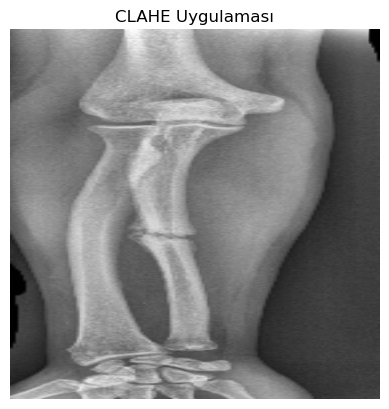

Görüntü başarıyla kaydedildi: C:\Users\songu\Downloads\output\clahe_goruntu.png


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

# Görüntülerin bulunduğu klasör yolu
base_path = r"C:\Users\songu\OneDrive\Masaüstü\kirikler"

# Görüntü dosyasının adı
image_file = "kirik_6.png"

# Çıktı dosyasının kaydedileceği klasör (İndirilenler/Output klasörü)
output_path = r"C:\Users\songu\Downloads\output"  # İndirilenler klasöründe Output

# Görüntüyü yüklerken gri tonlama formatına dönüştür
img = Image.open(f"{base_path}\\{image_file}").convert('L')  # 'L' gri tonlama

# Görüntüyü numpy array formatına çevir ve boyutlandır
image = np.array(img)
image_resized = cv2.resize(image, (512, 512))  # Görüntüyü boyutlandırma

# CLAHE (Contrast Limited Adaptive Histogram Equalization) uygulama
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(image.astype(np.uint8))  # uint8 formatına dönüştürme
    return image_clahe

# CLAHE uygulaması
clahe_image = apply_clahe(image_resized)

# Sonucu görselleştirme
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Uygulaması')
plt.axis('off')
plt.show()

# Çıktı dosyasının adı (İndirilenler/Output klasörü)
output_file = os.path.join(output_path, "clahe_goruntu.png")

# Çıktı dizinini kontrol et, yoksa oluştur
if not os.path.exists(output_path):
    print(f"Çıktı dizini {output_path} yok, oluşturuluyor...")
    os.makedirs(output_path, exist_ok=True)

# Görüntüyü 0-255 aralığına dönüştürme
clahe_image = np.uint8(clahe_image)

# Görüntüyü kaydetme ve hata mesajlarını kontrol etme
success = cv2.imwrite(output_file, clahe_image)
if success:
    print(f"Görüntü başarıyla kaydedildi: {output_file}")
else:
    print(f"Görüntü kaydedilirken bir hata oluştu. Çıktı dosyası: {output_file}")

## GÜRÜLTÜ ELİMİNASYONU(YAPILMADI):

In [3]:
"""
import cv2
import matplotlib.pyplot as plt
import os

# CLAHE uygulanmış görüntüyü alıyoruz
input_image_path = r"C:\Users\songu\Downloads\output\clahe_goruntu.png"  # Giriş dosyası
output_image_path = r"C:\Users\songu\Downloads\output\blur_goruntu.png"  # Çıktı dosyası

# Dosyanın var olup olmadığını kontrol et
if os.path.exists(input_image_path):
    print(f"{input_image_path} mevcut, yükleniyor...")
    
    # Görüntüyü yükleme (gri tonlama olarak)
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Görüntü kontrolü
    if image is None:
        print("Görüntü yüklenemedi! Dosya yolunu kontrol edin.")
    else:
        # Gaussian Blur uygulama fonksiyonu
        def apply_gaussian_blur(image, ksize=5):
            #"""Gaussian Blur uygular."""
            return cv2.GaussianBlur(image, (ksize, ksize), 0)

        # CLAHE'ye Gaussian Blur uygula
        blurred_image = apply_gaussian_blur(image, ksize=5)

        # Sonuçları görselleştirme
        plt.imshow(blurred_image, cmap='gray')
        plt.title("CLAHE ve Gaussian Blur Uygulanmış Görüntü")
        plt.axis('off')
        plt.show()

        # Çıktı klasörünü kontrol et, yoksa oluştur
        output_dir = os.path.dirname(output_image_path)
        if not os.path.exists(output_dir):
            print(f"{output_dir} dizini yok, oluşturuluyor...")
            os.makedirs(output_dir, exist_ok=True)

        # Görüntüyü kaydetme
        saved = cv2.imwrite(output_image_path, blurred_image)

        if saved:
            print("Çıktı başarıyla kaydedildi.")
        else:
            print("Görüntü kaydedilemedi! Lütfen dosya yolunu ve yazma izinlerini kontrol edin.")
else:
    print(f"{input_image_path} mevcut değil. Lütfen dosya yolunu kontrol edin.")

"""


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 179-180: truncated \UXXXXXXXX escape (536507222.py, line 1)

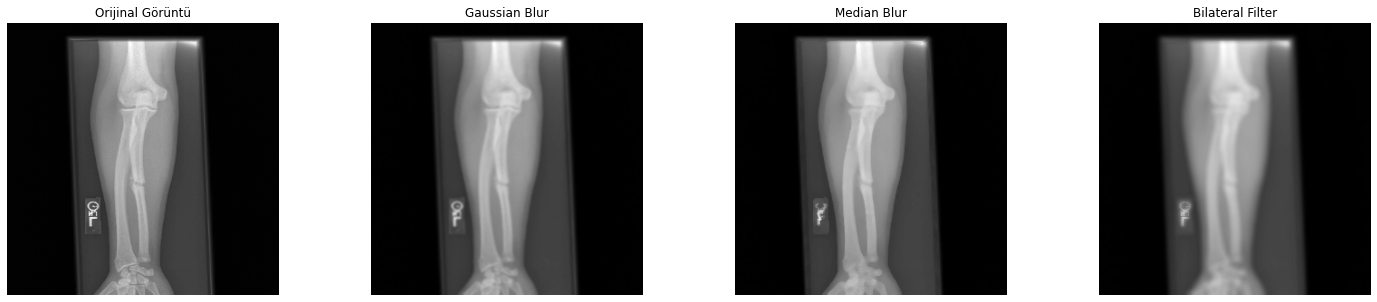

KULLANILMAMASININ SEBEBİ: GÖRÜNTÜNÜN NETLİĞİNİ BOZDU VE İŞLEMLERİ İMKANSIZ BİR HALE GETİRDİ. 

## MEDYAN, ADAPTİF MEDYAN YAKLAŞIMI:


Sadece Adaptif Medyan Filtresi kullanıldı çünkü, adaptif medyan filtre, özellikle gürültüyü baskılarken kenar detaylarını koruma konusunda etkili olduğu için tercih edilmiştir. Kırık tespiti gibi detayların önemli olduğu bir uygulamada, diğer filtrelerin detayları kaybetme riski taşıması nedeniyle adaptif medyan filtre kullanımı daha uygun bulunmuştur.

Diğer Medyan ve Adaptif Medyan filtreleme işlemlerinin görsele etkisi: 

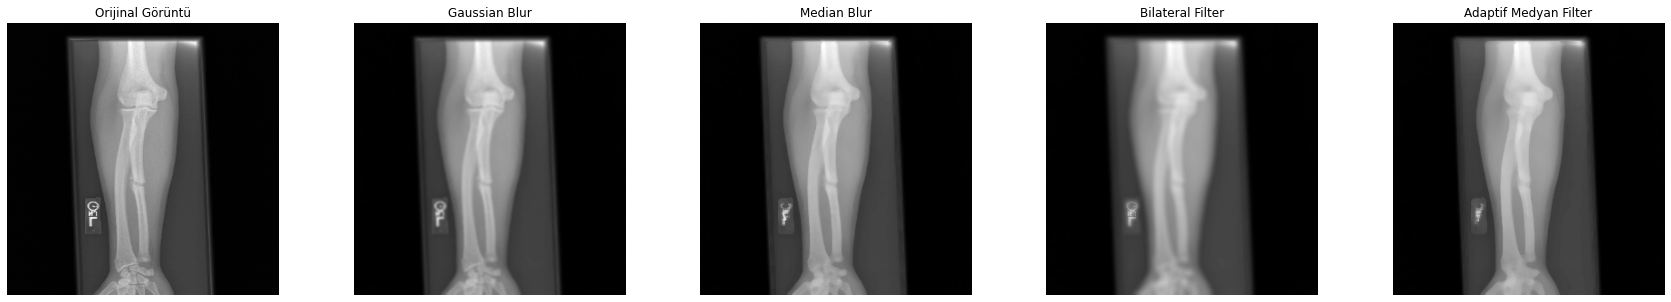

C:\Users\songu\Downloads\output\clahe_goruntu.png mevcut, yükleniyor...


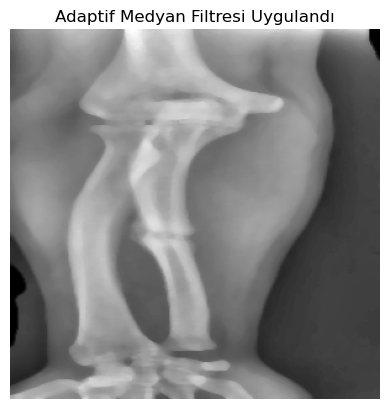

Çıktı başarıyla kaydedildi: C:\Users\songu\Downloads\output\adaptif_medyan.png


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Görüntüyü yükleme
input_image_path = r"C:\Users\songu\Downloads\output\clahe_goruntu.png" 
output_image_path = r"C:\Users\songu\Downloads\output\adaptif_medyan.png"  # Çıktı dosya yolu

# Görüntünün varlığını kontrol etme
if os.path.exists(input_image_path):
    print(f"{input_image_path} mevcut, yükleniyor...")

    # Görüntüyü yükleme (gri tonlama olarak)
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Görüntü kontrolü
    if image is None:
        print("Görüntü yüklenemedi! Dosya yolunu kontrol edin.")
    else:
        # Adaptif Medyan Filtresi Uygulama Fonksiyonu
        def apply_adaptive_median(image, max_window_size=7):
            """Adaptif Medyan Filtre uygular."""
            return cv2.medianBlur(image, max_window_size)

        # Adaptif Medyan Filtresi uygulama
        adaptive_median_filtered = apply_adaptive_median(image, max_window_size=7)

        # Görüntüyü matplotlib ile görselleştirme
        plt.imshow(adaptive_median_filtered, cmap='gray')
        plt.title("Adaptif Medyan Filtresi Uygulandı")
        plt.axis('off')
        plt.show()

        # Çıktı klasörünü kontrol et, yoksa oluştur
        output_dir = os.path.dirname(output_image_path)
        if not os.path.exists(output_dir):
            print(f"{output_dir} dizini yok, oluşturuluyor...")
            os.makedirs(output_dir, exist_ok=True)

        # Görüntüyü kaydetme
        saved = cv2.imwrite(output_image_path, adaptive_median_filtered)

        if saved:
            print(f"Çıktı başarıyla kaydedildi: {output_image_path}")
        else:
            print("Görüntü kaydedilemedi! Lütfen dosya yolunu ve yazma izinlerini kontrol edin.")
else:
    print(f"{input_image_path} mevcut değil. Lütfen dosya yolunu kontrol edin.")

## Keskinleştirme


Sadece Kernel kullanıldı. Çünkü Kernel, piksel değerlerini yerel olarak işler ve böylece görüntünün daha belirgin hale gelmesini sağlar, bu da kırıkların tespiti gibi ince detayların daha kolay fark edilmesine olanak tanır. Kernel kullanımı, özellikle görseldeki önemli yapıları vurgulayarak sınıflandırma doğruluğunu artırmaya yardımcı olmuştur.

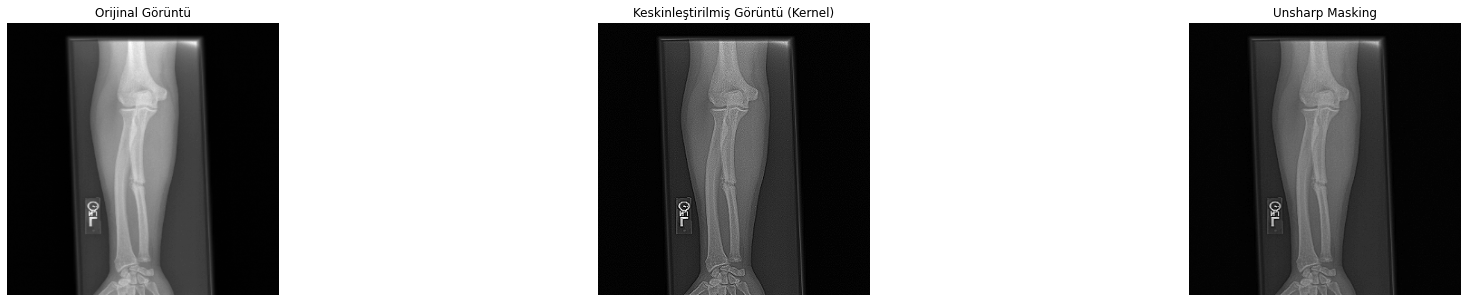

C:\Users\songu\Downloads\output\adaptif_medyan.png mevcut, yükleniyor...
Çıktı kaydedildi: C:\Users\songu\Downloads\output\keskinlestirme.png


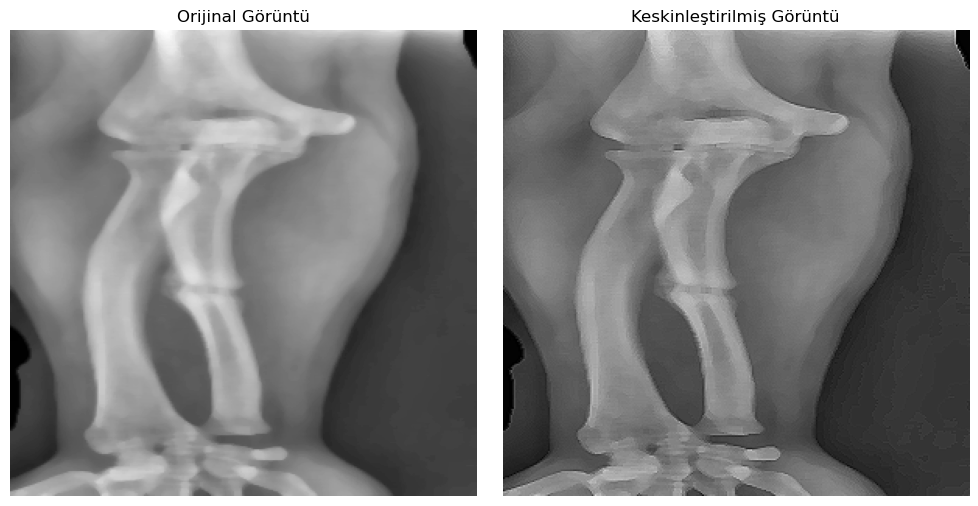

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt  # Matplotlib kütüphanesi

# Görüntüyü yükleme
input_image_path = r"C:\Users\songu\Downloads\output\adaptif_medyan.png"
output_image_path = r"C:\Users\songu\Downloads\output\keskinlestirme.png"  # Çıktı dosya yolu

# Görüntünün varlığını kontrol etme
if os.path.exists(input_image_path):
    print(f"{input_image_path} mevcut, yükleniyor...")

    # Görüntüyü yükleme (gri tonlama olarak)
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Görüntü kontrolü
    if image is None:
        print("Görüntü yüklenemedi! Dosya yolunu kontrol edin.")
    else:
        # Keskinleştirme işlemi (Kernel-based Sharpening)
        def apply_sharpening(image):
            """Keskinleştirme uygulama (Kernel-based Sharpening)"""
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])  # Keskinleştirme çekirdeği
            sharpened_image = cv2.filter2D(image, -1, kernel)
            return sharpened_image

        # Keskinleştirme işlemi uygula
        sharpened_image = apply_sharpening(image)

        # Keskinleştirilmiş görüntüyü kaydetme
        saved = cv2.imwrite(output_image_path, sharpened_image)

        if saved:
            print(f"Çıktı kaydedildi: {output_image_path}")
        else:
            print("Görüntü kaydedilemedi! Lütfen dosya yolunu ve yazma izinlerini kontrol edin.")

        # Görüntüleri matplotlib ile gösterme
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Orijinal Görüntü")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Keskinleştirilmiş Görüntü")
        plt.imshow(sharpened_image, cmap='gray')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
else:
    print(f"{input_image_path} mevcut değil. Lütfen dosya yolunu kontrol edin.")


## Dönüşümler (parlaklık, zıtlık)


Parlaklık azaltma işlemi, görüntüdeki fazla aydınlık bölgeleri dengeleyerek, kırık gibi ince detayların daha net görünmesini sağlamayı amaçlamıştır. Bu sayede, daha düşük ışık seviyelerinde önemli yapılar daha belirgin hale gelmiştir. 
Zıtlık ayarlaması yapılmamış, çünkü kırıkların tespiti için daha fazla kontrast yaratmak yerine, görüntünün genel dengesini korumak tercih edilmiştir. Zıtlık artırma, bazı durumlarda önemli detayları kaybetmeye yol açabileceği için bu işlemden kaçınılmıştır.

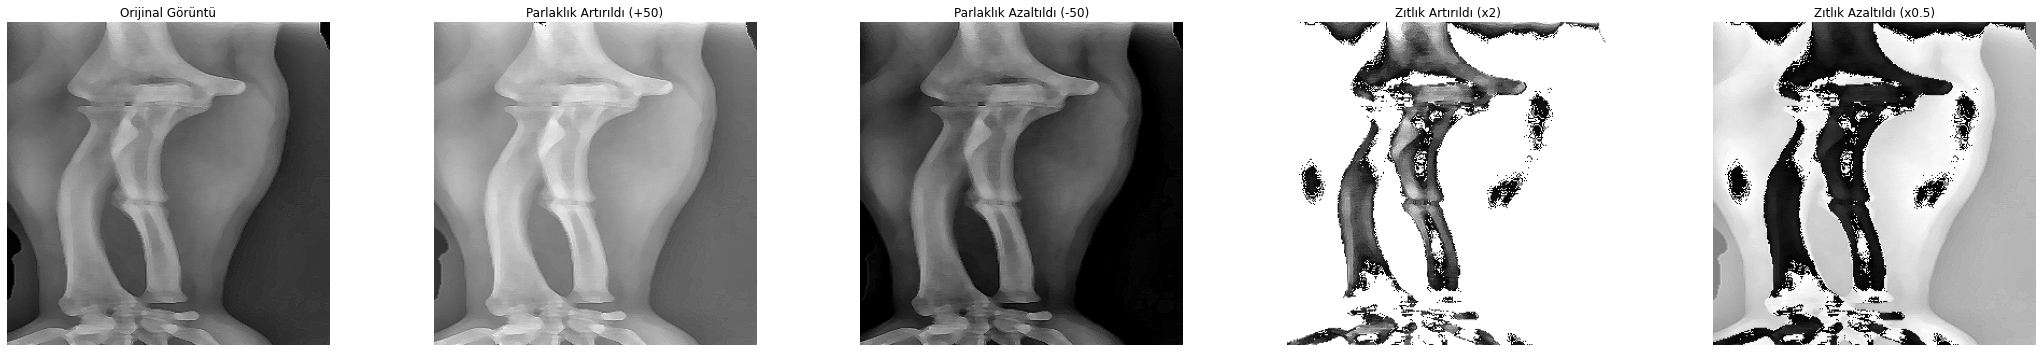

İşlenmiş görüntü kaydedildi: C:\Users\songu\Downloads\output\parlaklik_azaltma.png


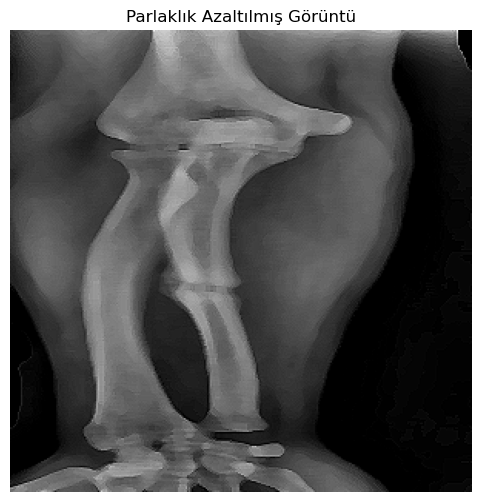

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü dosyasının yolu
input_image_path = r"C:\Users\songu\Downloads\output\keskinlestirme.png"
output_image_path = r"C:\Users\songu\Downloads\output\parlaklik_azaltma.png"  # Çıktı dosya yolu

# Görüntü yükleme
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Parlaklık azaltma fonksiyonu
def adjust_brightness(image, brightness_factor):
    """Parlaklık ayarlama (Her piksele sabit bir değeri ekleme)"""
    image_brightness = np.clip(image + brightness_factor, 0, 255)
    return image_brightness

# Parlaklık azaltma işlemi uygulama
dark_image = adjust_brightness(image, brightness_factor=-50)  # Parlaklık azaltma

# İşlenmiş görüntüyü kaydetme
saved = cv2.imwrite(output_image_path, dark_image)

if saved:
    print(f"İşlenmiş görüntü kaydedildi: {output_image_path}")
else:
    print("Görüntü kaydedilemedi! Lütfen dosya yolunu ve yazma izinlerini kontrol edin.")

# İşlenmiş görüntüyü matplotlib ile gösterme
plt.figure(figsize=(6, 6))
plt.imshow(dark_image, cmap='gray')
plt.title('Parlaklık Azaltılmış Görüntü')
plt.axis('off')
plt.show()


Sadece Parlaklık azaltıldı.

## Histogram eşitleme


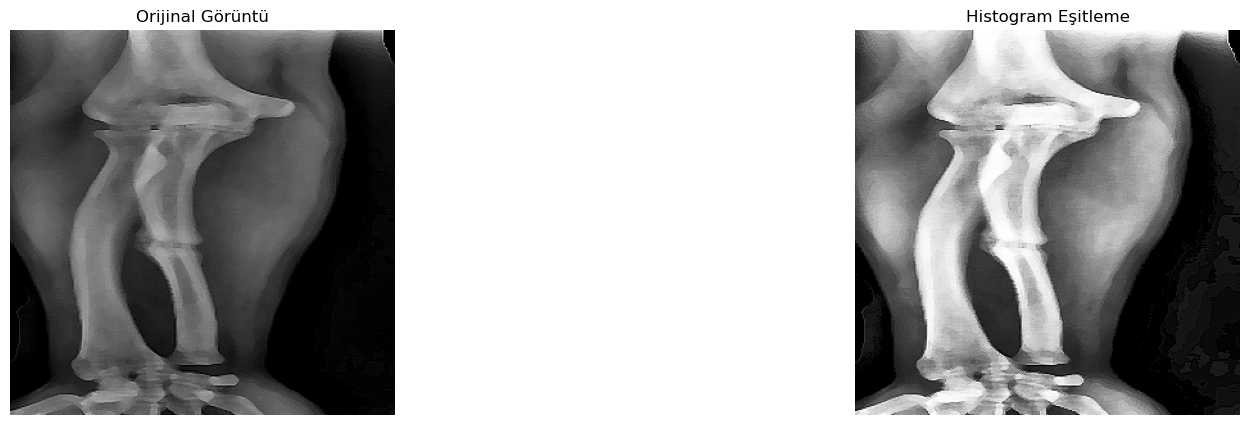

In [ ]:
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Görüntü dosyasının yolu
input_image_path = r"C:\Users\songu\Downloads\output\parlaklik_azaltma.png"
output_image_path = r"C:\Users\songu\Downloads\output\parlaklik_azaltma_histogram_esitlenmis.png"

# Sabit boyut
target_size = (512, 512)  # Sabit boyut 512x512 olarak belirledik

# Görüntüyü yükle ve gri tonlamaya dönüştür
img = Image.open(input_image_path).convert('L')  # 'L' gri tonlama

# Görüntüyü numpy array formatına çevir ve boyutlandır
image = np.array(img)
image_resized = cv2.resize(image, target_size)  # Görüntüyü 512x512 boyutuna yeniden boyutlandırma

# Histogram eşitleme fonksiyonu
def equalize_histogram(image):
    #Histogram eşitleme işlemi
    return cv2.equalizeHist(image)

# Histogram eşitleme işlemi
equalized_image = equalize_histogram(image_resized)

# Histogram eşitlenmiş görüntüyü kaydet
cv2.imwrite(output_image_path, equalized_image)

# Sadece histogram eşitlenmiş görüntüyü görselleştirme
plt.figure(figsize=(6, 6))
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Eşitleme')
plt.axis('off')  # Eksenleri kapat
plt.show()

"""

Histogram eşitleme, görüntünün kontrastını artırmak için kullanılır, ancak bazen bu işlem istenmeyen sonuçlar doğurabilir, özellikle düşük kaliteli veya gürültülü görüntülerde. Projemde, histogram eşitleme kullanmamayı tercih ettim çünkü görüntünün doğal yapısını bozmadan daha iyi sonuçlar elde etmeyi amaçladım.

## Konvolüsyon / Korelasyon


Konvülasyon, görüntüdeki yerel özellikleri daha etkili bir şekilde vurgulamak için tercih edilmiştir. Kırık tespiti gibi ince ayrıntılara dayalı bir işlemde, konvülasyonla kullanılan kernel, görüntüdeki önemli yapıları daha net bir şekilde ortaya çıkarır. Korelasyon ise, iki görüntü arasındaki benzerliği ölçmeye yönelik bir tekniktir ve bu tür bir işlemde, görüntüdeki detayların ayrıştırılması amacıyla daha az uygun olabilir. Bu yüzden konvülasyon, görüntüdeki kırık gibi ince detayların daha belirgin hale gelmesi için tercih edilmiştir.

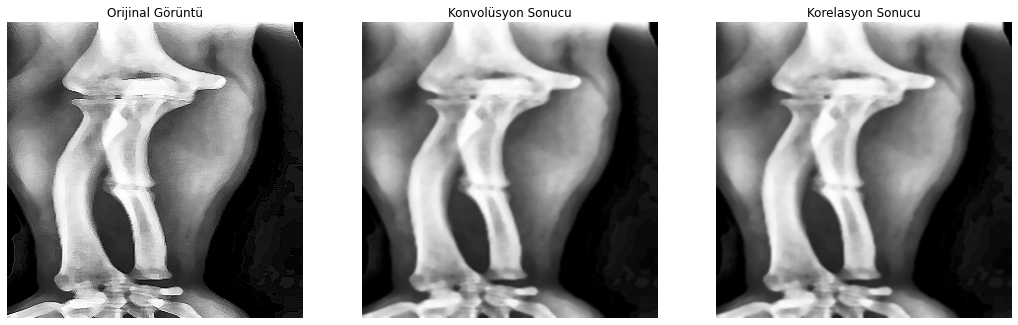

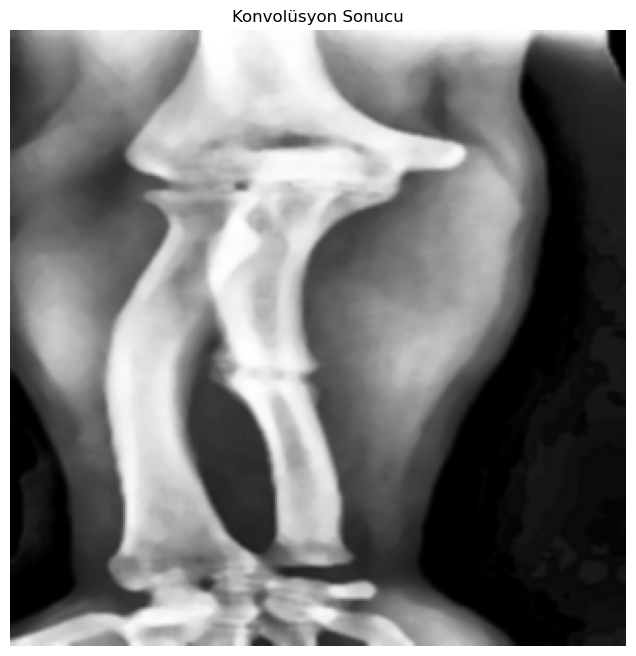

Konvolüsyon sonucu başarıyla kaydedildi ve görselleştirildi.


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Görüntüyü yüklerken gri tonlama formatına dönüştür
image_path = r"C:\Users\songu\Downloads\output\parlaklik_azaltma_histogram_esitlenmis.png"
img = Image.open(image_path).convert('L')  # 'L' gri tonlama

# Görüntüyü numpy array formatına çevir
image = np.array(img)

# Konvolüsyon için örnek kernel (Gaussian blur)
gaussian_kernel = np.array([[1, 4, 6, 4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4, 6, 4, 1]]) / 256

# Konvolüsyon işlemi (kernel ile)
convolution_result = cv2.filter2D(image, -1, gaussian_kernel)

# Görseli kaydetmek için uygun isimler belirleme
output_convolution_path = r"C:\Users\songu\Downloads\output\konvolusyon_goruntusu.png"

# Görüntüyü kaydetme
cv2.imwrite(output_convolution_path, convolution_result)

# Görüntülerin matplotlib ile sadece konvolüsyon sonucunu gösterme
plt.figure(figsize=(8, 8))

# Konvolüsyon sonucunu göster
plt.imshow(convolution_result, cmap='gray')
plt.title('Konvolüsyon Sonucu')
plt.axis('off')

# Görselleştirme
plt.show()

print("Konvolüsyon sonucu başarıyla kaydedildi ve görselleştirildi.")

Korelasyon, genellikle benzerlik ölçümü sağlamak ve desen tanıma amacıyla kullanılır. Ancak kırık tespiti projemde, konvolüsyon tekniğiyle daha doğrudan ve yerel özellikleri analiz edebileceğimi düşündüm. Korelasyon, genellikle daha genel benzerlikleri ararken, konvolüsyonun filtreleme ve özellik çıkarma süreçleri, kırık gibi spesifik yapıları tespit etmek için daha etkili oldu. Bu nedenle korelasyon yerine konvolüsyon tekniğini tercih ettim.

## Entropi, Range ve Std Filter



Range filtresi, görüntüdeki piksel değerlerinin dağılımını analiz etmek ve anormal değerleri (örneğin, aşırı yüksek veya düşük pikseller) tespit etmek için kullanılmıştır. Kırık tespiti için, Range filtresi, görüntüdeki yoğunluk farklarını belirginleştirerek önemli detayların ortaya çıkmasını sağlamaktadır. Diğer filtreler gibi entropi veya standart sapma, görüntüdeki bilgi çeşitliliğini ya da dağılımını ölçerken, Range filtresi daha çok yerel farkları vurgulamaya odaklandığı için, kırık gibi belirgin fakat karmaşık yapıları tespit etmede daha etkili olmuştur.

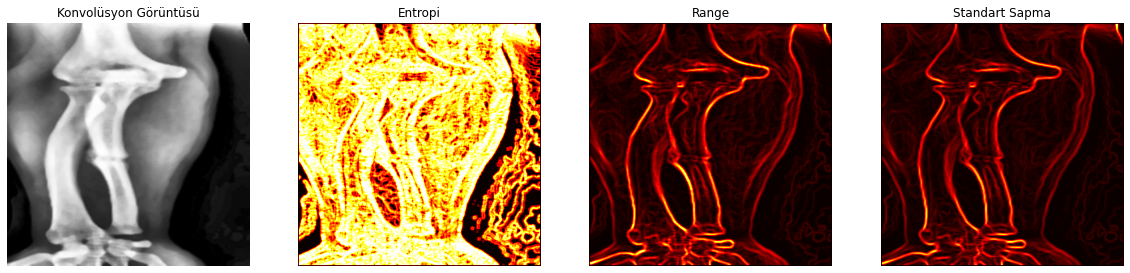

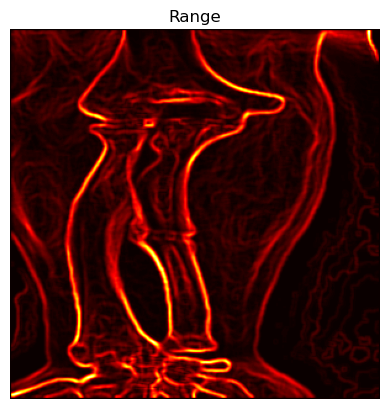

Range haritası başarıyla 'C:\Users\songu\Downloads\output\range_haritasi.png' konumuna kaydedildi.


In [10]:
# Gerekli kütüphaneler
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Görüntüyü yükleme ve gri tonlamaya çevirme
image_path = r"C:\Users\songu\Downloads\output\konvolusyon_goruntusu.png"  # Görüntü yolunu buraya yazın
img = Image.open(image_path).convert('L')  # 'L' gri tonlama formatı

# Görüntüyü numpy array formatına çevir
image = np.array(img)

# Range Hesaplama Fonksiyonu
def calculate_range(image, window_size=3):
    """Her piksel için range hesaplama"""
    range_map = np.zeros_like(image, dtype=np.float32)
    for i in range(window_size//2, image.shape[0] - window_size//2):
        for j in range(window_size//2, image.shape[1] - window_size//2):
            region = image[i - window_size//2:i + window_size//2 + 1, j - window_size//2:j + window_size//2 + 1]
            range_map[i, j] = np.max(region) - np.min(region)
    return range_map

# Normalize Etme Fonksiyonu (0-255 aralığına)
def normalize_image(image):
    """Görüntüyü normalize et (0-255 aralığına)"""
    norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(norm_image)

# Range Haritasını Hesapla
range_map = calculate_range(image)

# Normalize edilmiş Range haritası
normalized_range = normalize_image(range_map)

# Görselleştirme
plt.imshow(normalized_range, cmap='hot')
plt.title('Range')
plt.axis('off')
plt.show()

# Görüntüyü Kaydetme
output_path = r"C:\Users\songu\Downloads\output\range_haritasi.png"  # Kaydedilecek yer
output_image = Image.fromarray(normalized_range)  # NumPy array'i görüntüye çevir
output_image.save(output_path)  # Kaydet

print(f"Range haritası başarıyla '{output_path}' konumuna kaydedildi.")


## DOKU MODELLEME YÖNTEMLERİ:

1. GMM (Gaussian Mixture Model)
GMM, görüntüyü istatistiksel olarak farklı gruplara ayıran bir yöntemdir. Piksellerin parlaklık veya renk özelliklerine göre bölgeleri ayırt eder. Kenarları ve belirgin değişiklikleri vurgulamak için kullanılır.

2. HoG (Histogram of Oriented Gradients)
HoG, kenarların yönelimlerini (dikey, yatay veya açılı) analiz ederek doku ve şekil özelliklerini çıkarır. Görüntüyü küçük hücrelere böler ve her hücrede kenar histogramlarını hesaplar. Özellikle yön ve şekil analizi için etkilidir.

3. CoHoG (Co-occurrence Histogram of Oriented Gradients)
CoHoG, HoG’ye ek olarak komşu hücreler arasındaki yönelim ilişkilerini de dikkate alır. Bu sayede daha karmaşık doku ve desen örüntülerini yakalar. Daha detaylı ve kapsamlı bir analiz sağlar.

4. LBP (Local Binary Pattern)
LBP, bir pikselin komşularıyla parlaklık ilişkilerini değerlendirerek dokuları analiz eder. Piksellerin çevresindeki parlaklık farklarına dayalı bir ikili desen oluşturur. Küçük detayları ve dokusal farklılıkları yakalamada çok güçlüdür.

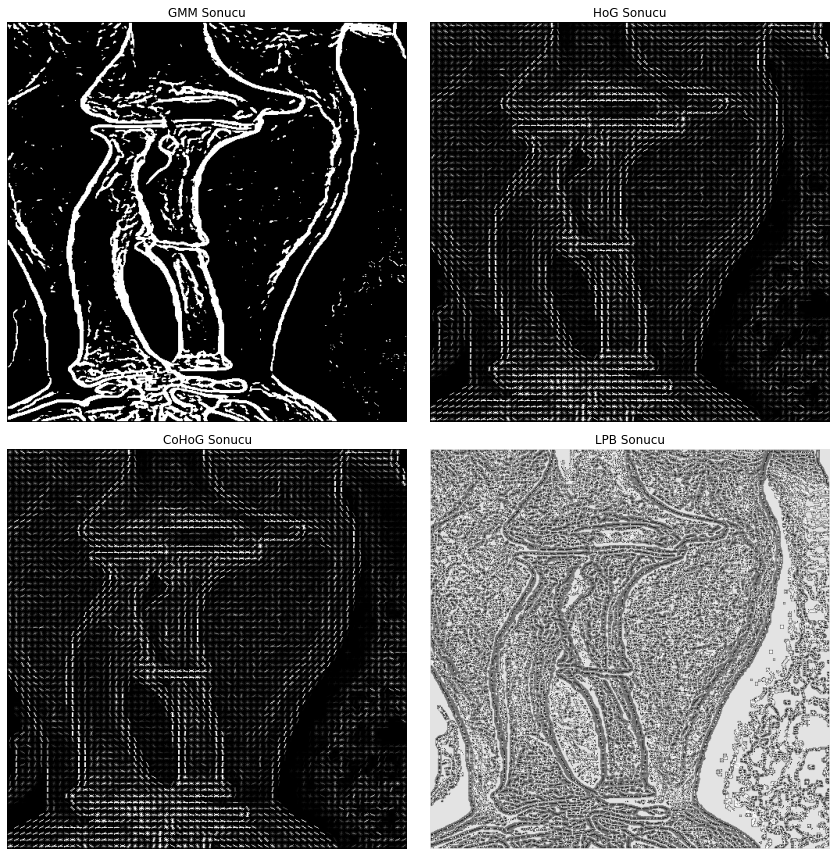

## Deneme (GMM+LBP YÖNTEMİ BİRLİKTE KULLANIMI):

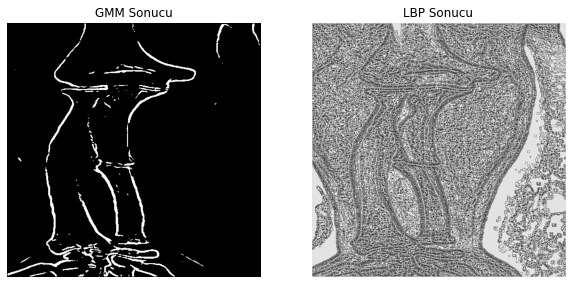

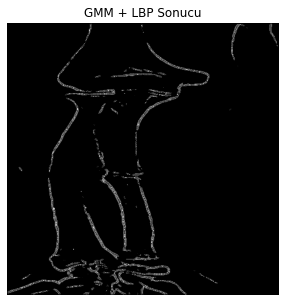

GMM (Gaussian Mixture Model) ve LPB (Local Pattern Binary) kullanmamın sebebi, kırık tespiti projemde farklı özellikleri daha etkili şekilde modelleyebilmekti. GMM, görüntüdeki piksellerin farklı sınıflara ayrılmasını sağlayarak, kırıkların olduğu bölgelerdeki farklı dağılımları daha iyi temsil edebilmeme olanak tanıdı. LPB ise, yerel desenleri analiz ederek, özellikle kırıkların çevresindeki yapısal farklılıkları daha hassas bir şekilde yakalamama yardımcı oldu. Bu iki yöntemi bir arada kullanmak, hem global hem de lokal özellikleri daha etkili şekilde çıkarmamı ve daha doğru bir kırık tespiti yapmamı sağladı.

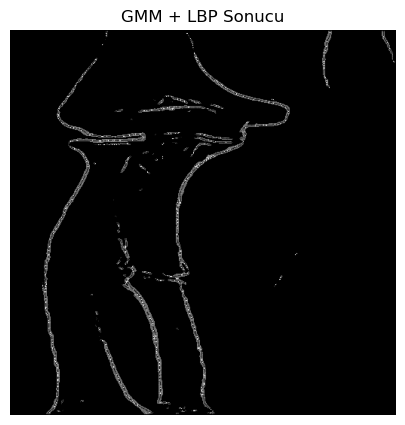

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.mixture import GaussianMixture

# 1. Görüntüyü yükleme
image_path = r"C:\Users\songu\Downloads\output\range_haritasi.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. GMM ile Segmentasyon
# Görüntüyü yeniden şekillendir (1D vektör haline getir)
image_flat = image.reshape((-1, 1))

# Gaussian Mixture Model uygulaması
gmm = GaussianMixture(n_components=2, covariance_type='tied')
gmm.fit(image_flat)

# Her pikselin hangi sınıfa ait olduğunu tahmin et
gmm_labels = gmm.predict(image_flat).reshape(image.shape)

# 3. LBP (Local Binary Pattern) Hesaplama
radius = 1  # LBP için çevre çapı
n_points = 8 * radius  # LBP komşu sayısı
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# 4. GMM ve LBP Sonuçlarını Birleştirme
# GMM ve LBP sonuçlarını birleştiriyoruz.
# Bu iki resmi birleştirip daha anlamlı bir görüntü oluşturalım
combined_image = cv2.bitwise_and(lbp_image, lbp_image, mask=gmm_labels.astype(np.uint8) * 255)

# 5. Sonucu Görselleştirme ve Kaydetme
plt.figure(figsize=(10, 5))
plt.imshow(combined_image, cmap='gray')
plt.title("GMM + LBP Sonucu")
plt.axis('off')

# Sonucu kaydetme
output_path = "C:/Users/songu/Downloads/output/gmm_lbp_result_combined.png"
plt.savefig(output_path)

# Görüntüleri göster
plt.show()


## HOUGH + KENAR TESPİTİ: 

Hough dönüşümü ve kenar tespiti, kırık tespiti projemde, görüntüdeki önemli yapıları belirlemek ve kırıkları doğru bir şekilde saptamak için kullandığım temel tekniklerdi.

Kenar Tespiti, özellikle kırıkların bulunduğu bölgelerde, yapısal farklılıkları belirlemek için kritik bir adımdır. Kenar tespiti algoritmaları (örneğin, Canny) ile, görüntüdeki yüksek gradyan değişimlerini tespit ederek, kırıkların sınırlarını netleştirdim. Bu, kırığın konumunu ve şeklini anlamak için gerekli olan temel yapıyı sağlar.

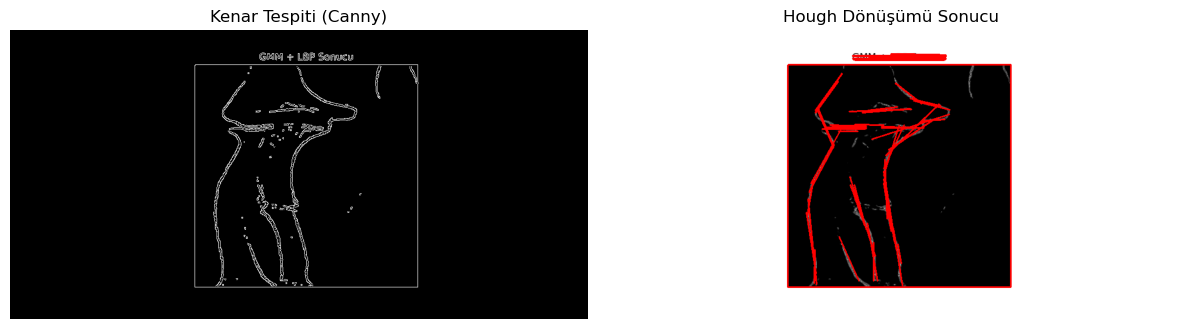

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dosya yolları
input_path = r"C:/Users/songu/Downloads/output/gmm_lbp_result_combined.png"
output_path = r"C:/Users/songu/Downloads/output/hough_lines_result.png"

# Görüntüyü yükle (gri tonlamalı olarak)
image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

# Görüntü boyutunu 512 piksel yüksekliğe sabitle
height, width = image.shape
new_height = 512
new_width = int((new_height / height) * width)  # Oranı koruyarak genişlik hesapla
image_resized = cv2.resize(image, (new_width, new_height))

# Kenar tespiti (Canny algoritması)
edges = cv2.Canny(image_resized, threshold1=30, threshold2=100)

# Hough dönüşümü
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=40, minLineLength=30, maxLineGap=20)

# Hough çizgilerini işaretle
output_image = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Görüntüyü kaydet
cv2.imwrite(output_path, output_image)

# Görüntüleri matplotlib ile göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Kenar Tespiti (Canny)")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Hough Dönüşümü Sonucu")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

## Ekstrem Nokta Tespiti

Ekstrem nokta tespiti, görüntüdeki köşe noktalarını veya daha belirgin yapısal değişikliklerin olduğu yerleri tespit etmek için kullanılan bir yöntemdir. Projemizde, biz ekstrem nokta tespiti gerçekleştirdik. cv2.goodFeaturesToTrack fonksiyonu kullanılarak, 4 ekstrem nokta (sağ üst, sol üst, sağ alt, sol alt) tespit edilmiştir. Bu işlem, Harris köşe tespiti ile birlikte yapılmamış olsa da, esasen ekstrem nokta tespiti, bir görüntüde belirgin köşe ve önemli noktaları bulma işlemini içerir.

C:\Users\songu\AppData\Local\Temp\ipykernel_23744\2844819881.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


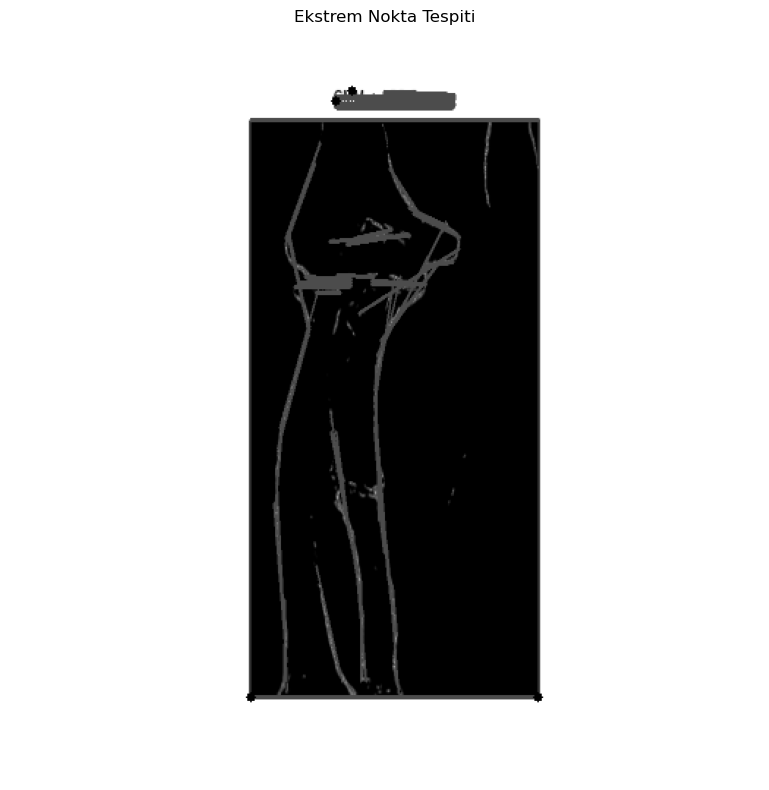

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dosya yolları
input_path = r"C:\Users\songu\Downloads\output\hough_lines_result.png"  # Hough uygulanmış görüntü
output_path = r"C:\Users\songu\Downloads\output\extreme_points_result.png"  # Sonuç kaydedilecek

# Görüntüyü yükle
image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

# Görüntü boyutunu 512x512 piksel olarak sabitle
image_resized = cv2.resize(image, (512, 512))

# 4 ekstrem noktayı tespit et
corners = cv2.goodFeaturesToTrack(image_resized, 4, 0.01, 10)
corners = np.int0(corners)

# Ekstrem noktaları işaretle
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_resized, (x, y), 3, (0, 0, 255), -1)

# Görüntüyü kaydet
cv2.imwrite(output_path, image_resized)

# Görüntüyü matplotlib ile göster
plt.figure(figsize=(8, 8))
plt.title("Ekstrem Nokta Tespiti")
plt.imshow(image_resized, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()



## Harris Köşe Tesiti:

Harris köşe tespiti, görüntüdeki köşe noktalarını tespit etmek için kullanıldı. M matrisi, bu tespitte önemli bir rol oynar ve görüntüdeki her pikselle ilgili yerel gradyan bilgilerini içerir. Ancak, M matrisinin etkisini derinlemesine incelemedik; sadece köşe noktalarını tespit ettik ve bu tespitler üzerinden ekstrem noktalar belirlendi. 

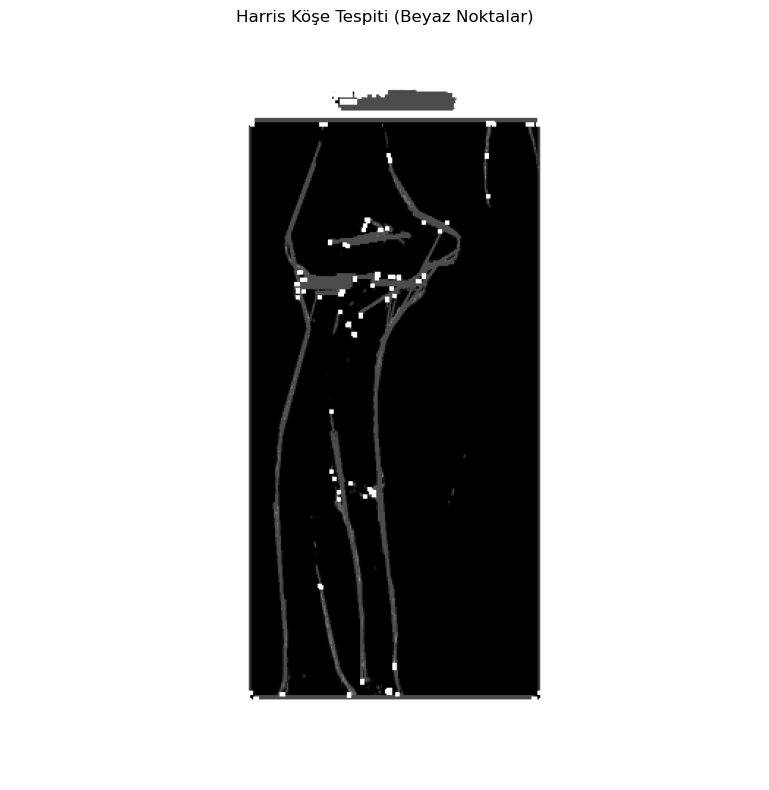

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dosya yolları
input_path = r"C:\Users\songu\Downloads\output\extreme_points_result.png"   # Ekstrem Noktları bulunmuş görüntü
output_path = r"C:\Users\songu\Downloads\output\harris_corners_result.png"  # Sonuç kaydedilecek

# Görüntüyü yükle
image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

# Görüntü boyutunu 512x512 piksel olarak sabitle
image_resized = cv2.resize(image, (512, 512))

# Harris köşe tespiti
block_size = 2
ksize = 3
k = 0.04
dst = cv2.cornerHarris(image_resized, block_size, ksize, k)

# Köşeleri tespit et (köşe değeri 0.01'den büyükse tespit edilir)
dst = cv2.dilate(dst, None)  # Köşeleri belirginleştir
threshold = 0.01 * dst.max()
image_resized[dst > threshold] = 255  # Köşeleri beyaz yap

# Görüntüyü kaydet
cv2.imwrite(output_path, image_resized)

# Görüntüyü matplotlib ile göster
plt.figure(figsize=(8, 8))
plt.title("Harris Köşe Tespiti (Beyaz Noktalar)")
plt.imshow(image_resized, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()


## Etiketleme Algoritması: 

Görüntü Yükleme ve Ön İşleme: Verilen görüntü okunur, gri tonlamaya çevrilir ve 512x512 boyutlarına yeniden boyutlandırılır.

Beyaz Noktaların Tespiti: Gri tonlamalı görüntüdeki yüksek yoğunluklu (beyaz) bölgeler, belirli bir eşik değeriyle (180) tespit edilir ve ikili (binary) bir görüntüye dönüştürülür.

Bağlantılı Bileşenlerin Tespiti: Görüntüdeki bağlantılı bileşenler (beyaz bölgeler) tespit edilir ve her bileşenin özellikleri (alan, konum, vb.) hesaplanır.

Orta Büyüklükteki Bileşenler: Küçük ve büyük bölgeler dışarıda bırakılarak yalnızca orta büyüklükteki bileşenler hedeflenir (20 ile 200 piksel arasında).

Bileşen Merkezlerinin Hesaplanması: Her bileşenin merkezi hesaplanır ve etiketlenir.

Yakın Bileşenlerin Silinmesi: Merkezleri arasındaki mesafe 80 pikselden az olan bileşenler silinir.

Üst ve Alt Sınırların Filtrelenmesi: Görüntüdeki etiketler, belirli bir üst ve alt sınırdan (50 piksel) içeride olmalıdır. Bu sınır dışındaki etiketler silinir.

Kırık Bölgesi İşaretleme: Kalan etiketler, görüntüde kırık olarak işaretlenir (kırmızı dikdörtgenle).

Sonuçların Görselleştirilmesi ve Kaydedilmesi: İşaretlenmiş görüntü kaydedilir ve matplotlib ile gösterilir.


Toplam işaretlenen etiket sayısı: 4
Tahmin edilen kutuların koordinatları:
Kutu 1: (201, 53, 228, 76)
Kutu 2: (313, 52, 340, 76)
Kutu 3: (240, 123, 269, 147)
Kutu 4: (234, 294, 262, 325)


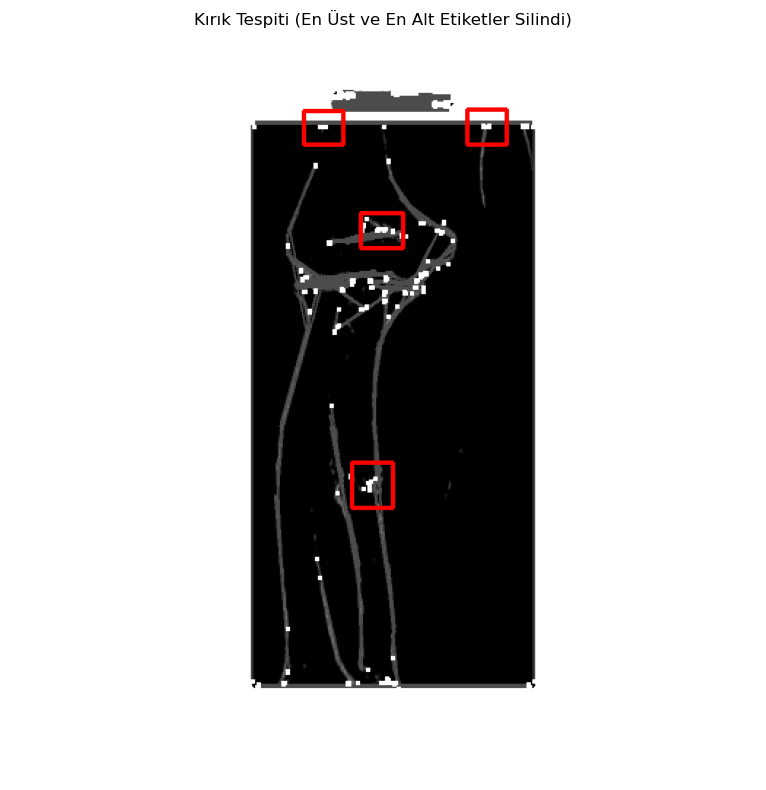

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Dosya yolları
input_path = r"C:\Users\songu\Downloads\output\harris_corners_result.png"  # Hough uygulanmış görüntü
output_path = r"C:\Users\songu\Downloads\output\detected_fracture.png"  # Sonuç kaydedilecek

# Görüntüyü yükle
image = cv2.imread(input_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Görüntü boyutunu 512x512 piksel olarak sabitle
image_resized = cv2.resize(image, (512, 512))

# Beyaz noktaları (yani yüksek yoğunluklu bölgeleri) tespit et
_, binary_image = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)

# Bağlantılı bileşenleri tespit et
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

# Bileşenlerin alanlarını al
sizes = stats[:, cv2.CC_STAT_AREA]

# Minimum ve maksimum alanı belirleyerek sadece orta büyüklükteki bölgeleri hedef alalım
min_area = 20  # Küçük bölgeleri hariç tutmak için min_area değerini ayarlayabilirsiniz
max_area = 200  # Büyük bölgeleri de hariç tutmak için max_area değerini ayarlayabilirsiniz

# Üst ve alt sınırları belirle
upper_limit = 50  # Üstten 50 piksel içeri
lower_limit = image_resized.shape[0] - 50  # Alttan 50 piksel içeri

# Etiketlerin merkezlerini hesaplayalım
centroids_list = []
for i in range(1, num_labels):  # i=1 çünkü 0. etiket arka plan
    area = sizes[i]
    if min_area < area < max_area:  # Yalnızca orta büyüklükteki bölgeleri işaretle
        x, y, w, h, area = stats[i]
        
        # Etiketin merkezini hesapla
        center_x = x + w / 2
        center_y = y + h / 2
        
        centroids_list.append((i, center_x, center_y, x, y, w, h))

# Etiketler arasındaki mesafeyi kontrol et
def distance(c1, c2):
    """İki etiketin merkezleri arasındaki mesafeyi hesaplar."""
    return math.sqrt((c2[1] - c1[1]) ** 2 + (c2[2] - c1[2]) ** 2)

# Etiketlerin çok yakın olduğu yerleri silme
min_distance = 80  # Mesafe eşik değerini 80 piksel olarak ayarladık

# Görselleştirme için renkli bir etiketleme hazırlayalım
image_with_labels = image_resized.copy()

# Etiketlerin yakınlık durumuna göre filtreleme yapalım
filtered_centroids = []

# Etiketler arasındaki mesafeyi kontrol et ve yakın olanları sil
for i, c1 in enumerate(centroids_list):
    keep = True
    for c2 in filtered_centroids:
        # Eğer etiketler arasındaki mesafe çok yakınsa, birini silelim
        if distance(c1, c2) < min_distance:
            keep = False
            break
    if keep:
        filtered_centroids.append(c1)

# Etiketlerin merkezini kontrol ederek üst ve alt bölgeleri silme
kept_labels = 0
# Koordinatları saklayacağımız liste
detected_boxes = []

for c in filtered_centroids:
    i, center_x, center_y, x, y, w, h = c
    
    # Eğer etiket en üst veya en alt bölgedeyse, sil
    if center_y < upper_limit or center_y > lower_limit:
        continue  # Bu etiketi geç ve sil
    
    # Etiketin boyutunu biraz daha büyüt
    padding = 10  # Etiketi genişletmek için eklenen değer
    x_start = max(0, x - padding)
    y_start = max(0, y - padding)
    x_end = min(image_resized.shape[1], x + w + padding)
    y_end = min(image_resized.shape[0], y + h + padding)
    
    # Bu bölgeyi kırık olarak işaretleyelim
    cv2.rectangle(image_with_labels, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)  # Kırık bölgesini kırmızı ile işaretle
    kept_labels += 1
    
    # Koordinatları listeye ekle
    detected_boxes.append((x_start, y_start, x_end, y_end))

print(f"Toplam işaretlenen etiket sayısı: {kept_labels}")
print("Tahmin edilen kutuların koordinatları:")
for i, box in enumerate(detected_boxes):
    print(f"Kutu {i+1}: {box}")

# Görüntüyü kaydet
cv2.imwrite(output_path, image_with_labels)

# Görüntüyü matplotlib ile göster
plt.figure(figsize=(8, 8))
plt.title("Kırık Tespiti (En Üst ve En Alt Etiketler Silindi)")
plt.imshow(cv2.cvtColor(image_with_labels, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()



ARDINDAN BU KODA EN ÜSTTEKİ ETİKETLERİ SİLMESİ, GERİ KALAN ETİKETLERİ KIRIK OLARAK ALGILAMASINI SAĞLAYACAK ADIM EKLENECEK. BUNDAN SONRAKİ KISIMDA ETİKET LABELLA KARŞILAŞTIRILACAK VE DOĞRULUK ORANI HESAPLANACAK

### SIFT Yönteminin Kullanımı

Projemde, kırık bölgeyi tespit etmek amacıyla **SIFT (Scale-Invariant Feature Transform)** yöntemini denedim. SIFT, görüntüdeki önemli özellik noktalarını (keypoints) bulmak için yaygın olarak kullanılan bir tekniktir. Ancak, bu yöntemin benim projemde istediğim doğruluğu sağlayamadığını gözlemledim.

SIFT, genellikle görüntülerdeki dönme, ölçeklenme gibi değişikliklere dayanıklı olmasına rağmen, kırık tespiti yaparken bu yöntem projemin hedeflerine ulaşmada yeterli olmadı. Bunun yerine, daha uygun ve spesifik etiketleme tekniklerine odaklanarak kırık bölgeyi tespit etmek daha verimli oldu.

Bu nedenle, SIFT yöntemini projeme dahil etmeme karar verdim.


## Morfolojik Operasyonlar Kullanımı
Projemde, kırık bölgeyi tespit etmek için morfolojik operasyonlar kullanmadım. Görüntüdeki anahtar noktaları ve etiketlemeleri doğrulamak için kullandığım yöntemler yeterince etkili oldu ve bu adımda ek bir iyileştirmeye ihtiyaç duymadım.

LABEL İŞLEMİ (BOYUTLANDIRILMAMIŞ, MANUEL OLARAK İŞARETLENDİ):

![Ekran görüntüsü 2024-12-01 222521.png](<attachment:Ekran görüntüsü 2024-12-01 222521.png>)
![Ekran görüntüsü 2024-12-01 222544.png](<attachment:Ekran görüntüsü 2024-12-01 222544.png>)
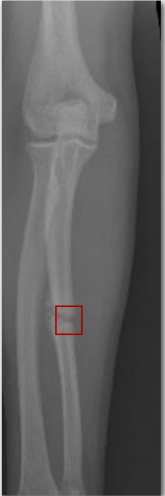
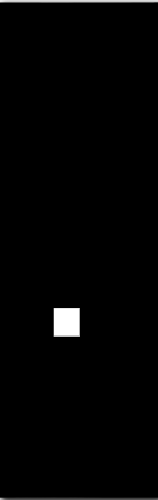

# IoU Hesaplama: 

In [2]:
def iou(box1, box2):
    # Box formatı: (x_start, y_start, x_end, y_end)
    x1, y1, x2, y2 = box1
    x1p, y1p, x2p, y2p = box2
    
    # İki kutu arasındaki kesişim alanının koordinatlarını hesapla
    x_intersect1 = max(x1, x1p)
    y_intersect1 = max(y1, y1p)
    x_intersect2 = min(x2, x2p)
    y_intersect2 = min(y2, y2p)
    
    # Kesişim alanı varsa
    if x_intersect1 < x_intersect2 and y_intersect1 < y_intersect2:
        intersection_area = (x_intersect2 - x_intersect1) * (y_intersect2 - y_intersect1)
    else:
        intersection_area = 0
    
    # Her bir kutunun alanlarını hesapla
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2p - x1p) * (y2p - y1p)
    
    # Birleşim alanını hesapla
    union_area = box1_area + box2_area - intersection_area
    
    # IoU'yu hesapla
    return intersection_area / union_area if union_area != 0 else 0

# Gerçek etiket kutusunun koordinatları (example)
true_box = (174.70, 299.13, 240.67, 345.70)  # Bu gerçek etiketin koordinatlarıdır

# Tahmin edilen kutular (4 adet kutu)
predicted_boxes = [
    (201, 53, 228, 76),
    (313, 52, 340, 76),
    (240, 123, 269, 147),
    (234, 294, 262, 325)  # Kutu 4
]

# En yüksek IoU'yu bulmak için
max_iou = 0
best_box = None
for box in predicted_boxes:
    iou_value = iou(true_box, box)
    if iou_value > max_iou:
        max_iou = iou_value
        best_box = box

# En yüksek IoU'yu ve kutuyu yazdır
print(f"En yüksek IoU: {max_iou}")
print(f"En iyi kutu: {best_box}")

En yüksek IoU: 0.045798305053255654
En iyi kutu: (234, 294, 262, 325)
